<a href="https://colab.research.google.com/github/tom-sb/anemEye/blob/main/anemiaAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
#from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
trainInPath = '/content/drive/MyDrive/SegmentData/DATA/target2'
testInPath = '/content/drive/MyDrive/SegmentData/DATA/testtarget2'
trainOutPath = '/content/drive/MyDrive/SegmentData/DATA/targetbin'
testOutPath = '/content/drive/MyDrive/SegmentData/DATA/testtargetbin'



In [ ]:
#img_lst=[]
def load_images(path):
    img_lst=[]
    for image_name in os.listdir(path):
        img_1 = cv2.imread(os.path.join(path,image_name),cv2.IMREAD_GRAYSCALE)
        #cvt_img = cv2.imread(os.path.join(path,image_name))
        #img = cv2.cvtColor(cvt_img, cv2.COLOR_BGR2RGB)

        #plt.imshow(img,cmap='gray')
        #plt.imshow(img)
        #plt.show()
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #img_array = Image.fromarray(img, 'RGB')
        #resized_img = img_array.resize((28, 28))
        img = cv2.resize(img_1,(500,500))
        img = img.astype('float32') / 255.
        #resized_img = cv2.resize(img,(128, 128))
        #img_lst.append(np.array(resized_img))
        img_lst.append(np.array(img))


        #img_lst.append(resized_img)
    return img_lst



In [ ]:
class Masker(Model):
  def __init__(self):
    super(Masker, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(500, 500, 1)),
      layers.Conv2D(4, (3, 3), activation="relu", padding="same",strides=2),
      #layers.MaxPooling2D((2, 2), padding="same"),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2),
      #layers.MaxPooling2D((2, 2), padding="same"),
      #layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      #layers.MaxPooling2D((2, 2), padding="same"),
      ])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      #layers.Conv2DTranspose(4, kernel_size=3, strides=2, activation='relu', padding='same'),
      #layers.Conv2DTranspose(4, kernel_size=3, strides=2, activation='relu', padding='same'),
      #layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
      #layers.Conv2DTranspose(4, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Masker()

In [ ]:
x_train = np.array(load_images(trainInPath))
y_train = np.array(load_images(trainOutPath))
x_test = np.array(load_images(testInPath))
y_test = np.array(load_images(testOutPath))

#x_train = x_train.astype('float32') / 255.
#y_train = y_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
#y_test = y_test.astype('float32') / 255.

print(type(y_train[1]),type(y_test))
print(x_test.shape,y_test.shape)
print(x_train.shape,y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(68, 500, 500) (68, 500, 500)
(339, 500, 500) (339, 500, 500)


In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train, y_train,
                epochs=34,
                shuffle=True,
                validation_data=(x_test, y_test))


Epoch 1/34
11/11 [==============================] - 69s 6s/step - loss: 0.2406 - val_loss: 0.2285
Epoch 2/34
11/11 [==============================] - 54s 5s/step - loss: 0.2103 - val_loss: 0.1773
Epoch 3/34
11/11 [==============================] - 56s 5s/step - loss: 0.1396 - val_loss: 0.0892
Epoch 4/34
11/11 [==============================] - 54s 5s/step - loss: 0.0718 - val_loss: 0.0563
Epoch 5/34
11/11 [==============================] - 54s 5s/step - loss: 0.0561 - val_loss: 0.0517
Epoch 6/34
11/11 [==============================] - 54s 5s/step - loss: 0.0538 - val_loss: 0.0513
Epoch 7/34
11/11 [==============================] - 54s 5s/step - loss: 0.0536 - val_loss: 0.0514
Epoch 8/34
11/11 [==============================] - 54s 5s/step - loss: 0.0537 - val_loss: 0.0514
Epoch 9/34
11/11 [==============================] - 54s 5s/step - loss: 0.0536 - val_loss: 0.0513
Epoch 10/34
11/11 [==============================] - 54s 5s/step - loss: 0.0536 - val_loss: 0.0513
Epoch 11/34
11/11 [

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 250, 250, 4)       40        
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 8)       296       
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.decoder.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose_12 (Conv2D  (None, 250, 250, 16)     1168      
 Transpose)                                                      
                                                                 
 conv2d_transpose_13 (Conv2D  (None, 500, 500, 8)      1160      
 Transpose)                                                      
                                                                 
 conv2d_20 (Conv2D)          (None, 500, 500, 1)       73        
                                                                 
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


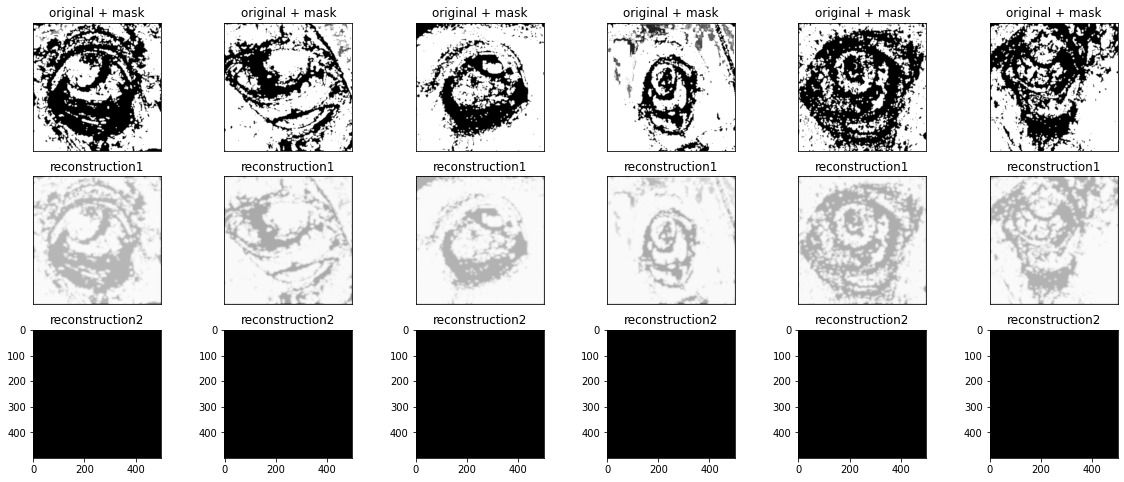

In [ ]:
n = 6
plt.figure(figsize=(20, 8))
for i in range(n):

    # display original + mask
    ax = plt.subplot(3, n, i + 1)
    plt.title("original + mask")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("reconstruction1")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()

    # display reconstruction
    cx = plt.subplot(3, n, i + n+n + 1)
    plt.title("reconstruction2")
    #plt.imshow(tf.squeeze(decoded_imgs[i]))
    #print(x_test[0][0])
    #print(decoded_imgs[0][0].astype('float32') * 255.)
    ret,thresh1 = cv2.threshold(decoded_imgs[i].astype('float32') * 255.,60,80,cv2.THRESH_BINARY)
    plt.imshow(np.array(thresh1))

    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()
